# MTH9879 Homework 1

Assigned: January 26, 2023.
Due: February 9, 2023 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

### 1. (4 points) 

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

The initial trading strategy is called "constant participation rate", which is one of splitting the order in such a way that each "child" order represents a fixed fraction of the total traidng volume over a given period of time. So it calls for larger trades if overall volume increases. It will cause problem when the "parent" order is relatively large, as the sub-orders themselves can also give a false impression of large volume, accelerating the main order's execution.

The crash is triggered by a singal very large sell order in the E-mini SP500 index(75,000), the child orders is still relatively large, and as it's executed fixed-fractionally, the sub-order trigger a very sharp price drop and exhausts the market liquidy and brings a snowball effect, which eventually triggered the falsh crash.

The algo could have been amended if we monitor the market impact of the sub-orders in real-time, we can quote sub-orders as planed if only the market impact is within a certain threhold so that we can avoid this kind of one-side negative impact.



### <font color=blue> 1. Solution </font>


### 2. (0 points) 

Read Chapters 3 and 8 of Trades, Quotes and Prices by Bouchaud et al., at least sections 8.1 to 8.5.  8.6 and 8.7 are optional.

## The Santa Fe zero-intelligence model

In [43]:
import numpy as np
import random
import matplotlib.pyplot as plt
import zero_intelligence
import pandas as pd
import multiprocessing as mp
import time

%config InlineBackend.figure_format = 'retina'
plt.xkcd(1)

### The zero-intelligence `ZI` class

In [44]:
from zero_intelligence import ZI

### 3. (4 points)

Using the provided methods in the *ZI* class (with $\lambda = 1$, $\mu = 10$, $\nu = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

### <font color=blue>3. Solution </font>

In [45]:
# parameters setting
lmda = 1
mu = 10
nu = 1/5.0
# instanize ZI class
zi = ZI(lmda, mu, nu)

In [46]:
# add 2 best bid
zi.limit_buy(zi.best_bid())
zi.limit_buy(zi.best_bid())

['LB', -1]

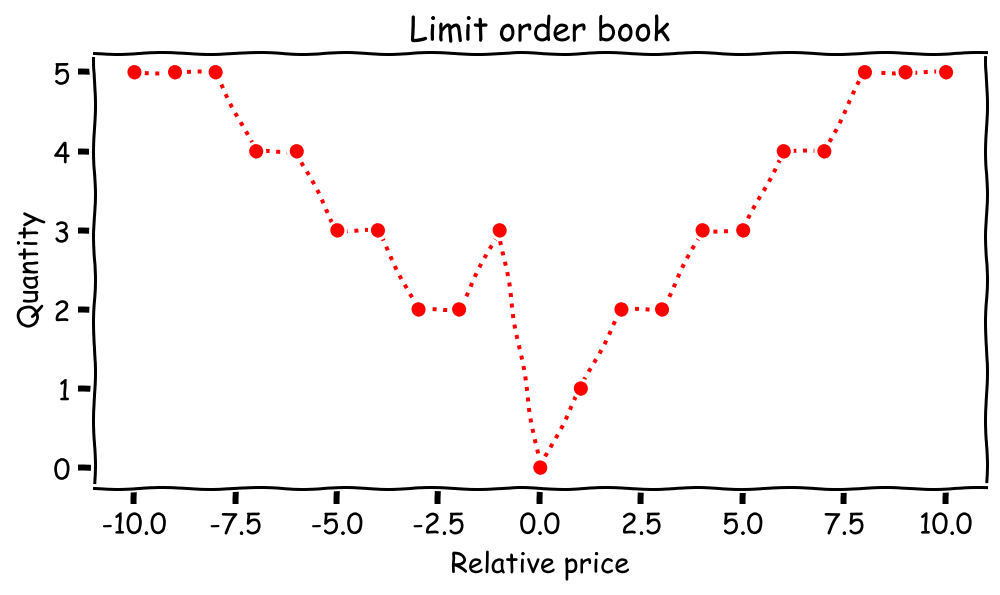

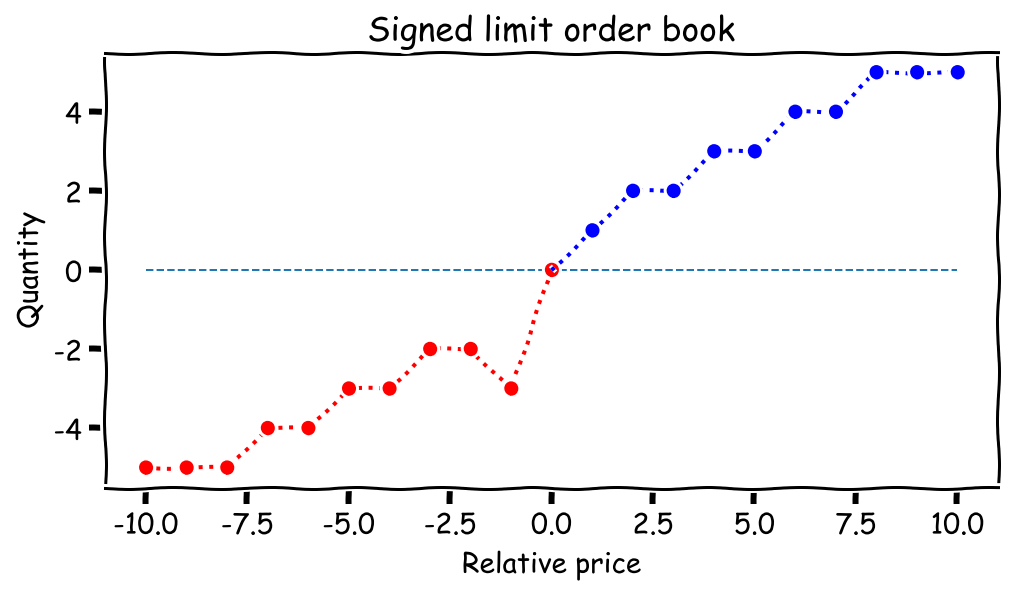

In [47]:
zi.book_plot()
zi.book_plot(signed=True)

### 4. (16 points)

(a) Use the code supplied to simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|Case| lambda| mu | nu |
|:-:|:--:|:--:|:----:|
|I| 1 | 10 | $\frac15$|
|II| 1 | 8 |  $\frac15$|
|III| 1 |  10 | $\frac16$|
|IV| 1  | 10 | $\frac18$| 

In each case, burn-in 1,000 events before kicking off the simulation. (Warning: This might take some time to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

### <font color=blue> 4(a) Solution </font>

In [48]:
# Average book shape in the ZI simualtion
import time
def avg_book_shape(lmda,mu,nu, num_burnt,num_sim):
    # instanize ZI class
    zi = ZI(lmda,mu,nu)
    # burn in for num_burnt
    book_shape = zi.generate_events(num_burnt)
    
    # generate num_sim events
    start = time.time()
    avg_book_shape = zi.generate_events(num_sim)
    time_delta = time.time() - start
    print(time.strftime("%H:%M:%S", time.gmtime(time_delta)))
    # plot the average book shape
    band = 20
    plt.figure(figsize=(9, 5))
    plt.plot([x for x in range(-band, band + 1)], avg_book_shape, 'b:')
    plt.plot([x for x in range(-band, band + 1)], avg_book_shape, 'ro')
    plt.title(f'Avage book shape after {num_sim} events\n lambda={lmda}, mu={mu}, nu={nu}')
    plt.xlabel('Relative price')
    plt.ylabel('Quantity');
    return avg_book_shape


### <font color=blue> 4(b) Solution </font>

00:00:23


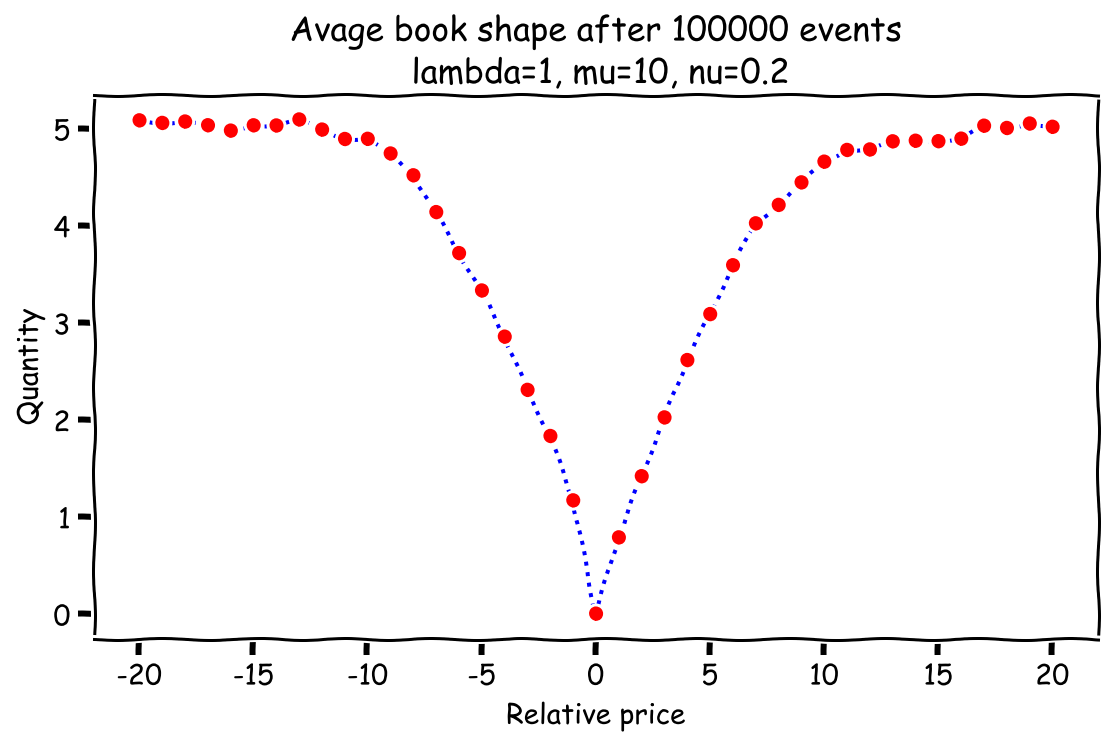

In [49]:
# Case 1: lambda = 1, mu = 10, nu = 1/5
book1 = avg_book_shape(1,10,1/5.0,1000,100000)

00:00:23


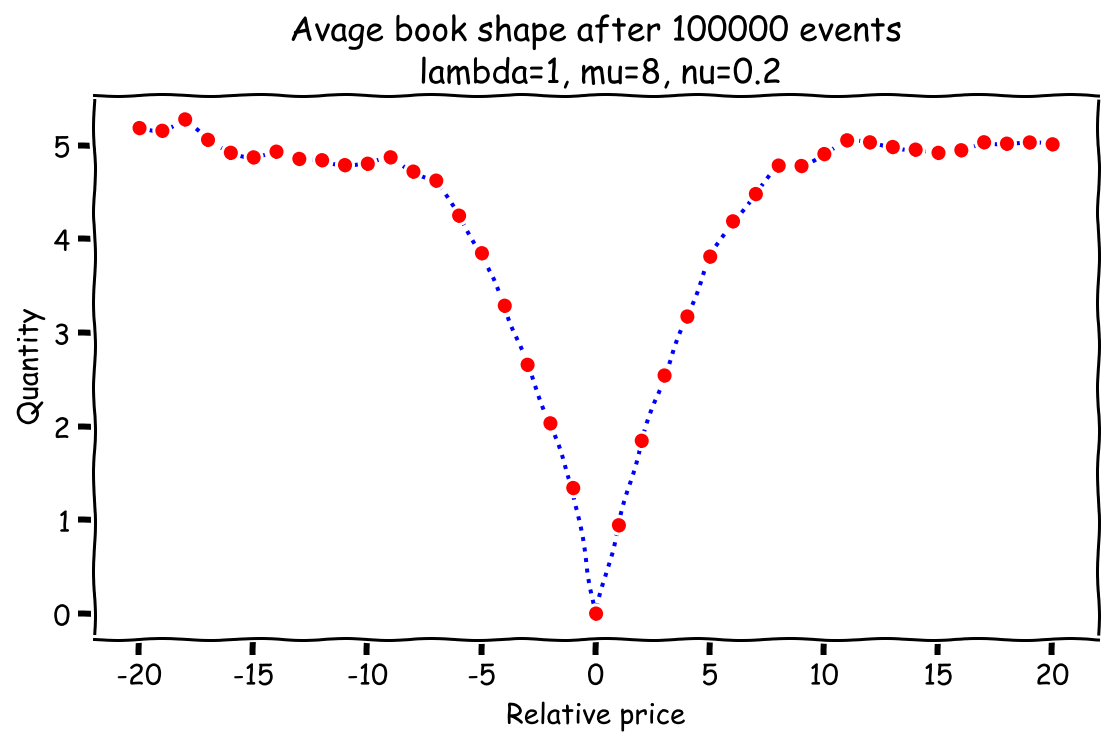

In [50]:
# Case 2: lambda = 1, mu = 8, nu = 1/5
book2 = avg_book_shape(1,8,1/5.0,1000,100000)

00:00:23


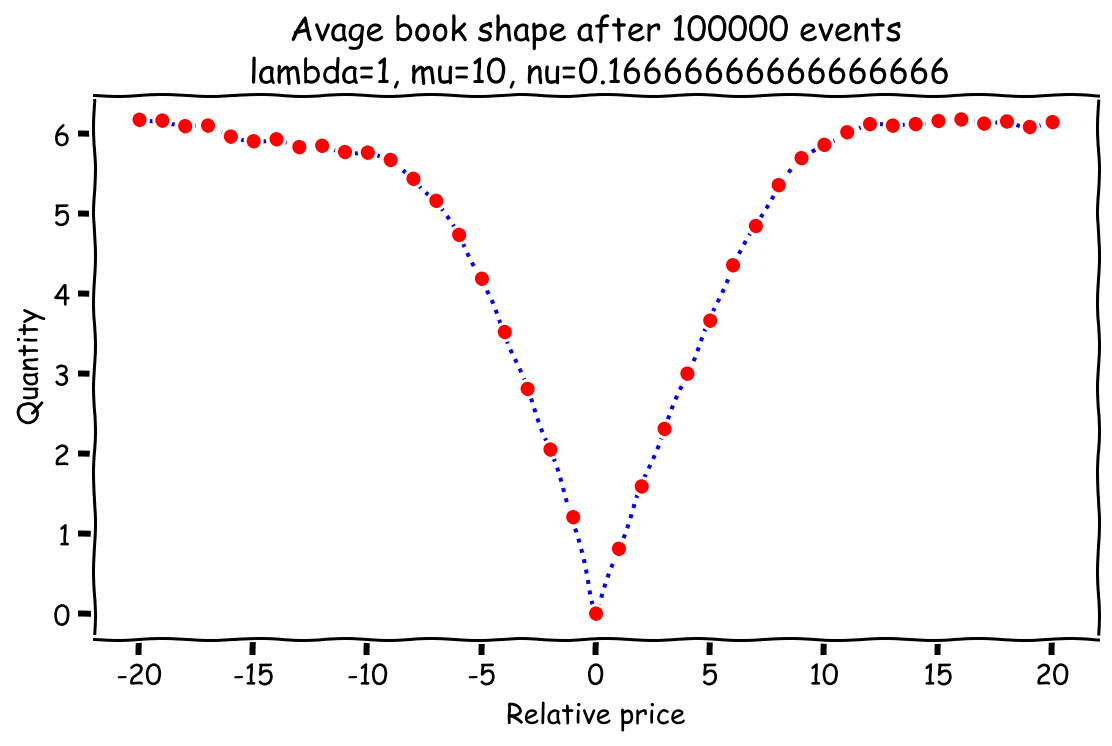

In [51]:
# Case 3: lambda = 1, mu = 10, nu = 1/6
book3 = avg_book_shape(1,10,1/6.0,1000,100000)

00:00:22


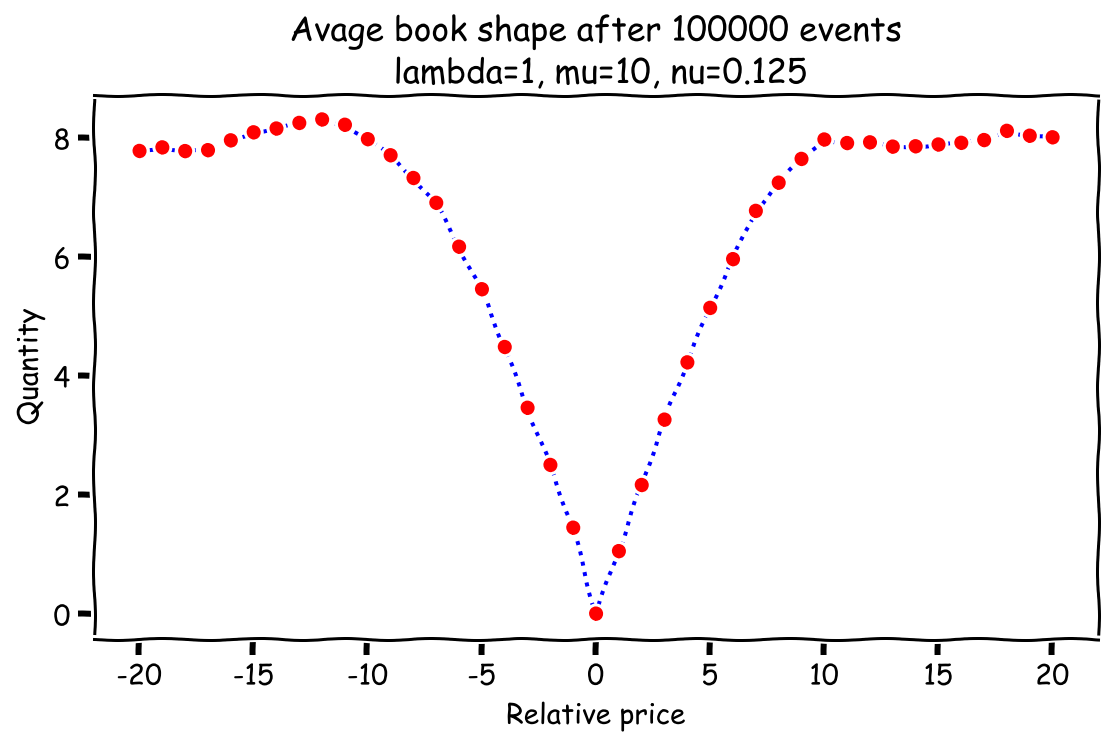

In [52]:
# Case 4: lambda = 1, mu = 10 ,nu = 1/8
book4 = avg_book_shape(1,10,1/8.0,1000,100000)

### <font color=blue> 4(c) Solution </font>

In [53]:
# calculate atm slop
from sklearn.linear_model import LinearRegression
def cal_atm_slope(book):
    fit1 = LinearRegression().fit(np.array([x for x in range(-10, 0)]).reshape(-1, 1), book[10:20])
    slope1 = fit1.coef_[0]
    fit2 = LinearRegression().fit(np.array([x for x in range(0, 11)]).reshape(-1, 1), book[20:31])
    slope2 = fit2.coef_[0]
    slope = (slope2-slope1) / 2
    return slope

def cal_book_depth(book):
    return (np.mean(book[0:10])+np.mean(book[31:41]))/2

In [54]:
print(cal_atm_slope(book1))
print(cal_atm_slope(book2))
print(cal_atm_slope(book3))
print(cal_atm_slope(book4))

0.44271156060615396
0.44275643939401943
0.559885924242526
0.7807864848485901


The slope of the order book given by ZI model is $\frac{\lambda^2}{\mu \nu}$. The table below shows the theoritical and simulated slope for our given 4 sets of parameters. The result confirm that the slopes of the simulation is consistent with our dimensional analysis.

|Case| theoretical| simulated |
|:-:|:--:|:--:|
|I| 0.5| 0.4427|
|II| 0.625 | 0.4428|
|III| 0.6 |  0.5599|
|IV| 0.8  | 0.7808| 

### <font color=blue> 4(d) Solution </font>

In [55]:
print(cal_book_depth(book1))
print(cal_book_depth(book2))
print(cal_book_depth(book3))
print(cal_book_depth(book4))

4.970040000000383
4.992063000000466
6.047656000000992
7.974853500001364


The asymptoticdepth of the order book given by ZI model is $\frac{\lambda}{\nu}$. 
The table below shows the theoritical and simulated slope for our given 4 sets of parameters. The result confirm that the slopes of the simulation is consistent with our dimensional analysis.

|Case| theoratical| simulated |
|:-:|:--:|:--:|
|I| 5| 4.9700|
|II| 5 | 4.9921|
|III| 6 | 6.0477|
|IV| 8  | 7.9749| 

### 5. (16 points)

Consider the Santa Fe model with $\lambda = 1$, $\mu = 10$, and $\nu = 1/5$. The aim of this assignment is to reproduce Figures 3 and 7 of Lecture 1.  

(a) For each size $q_b$ at best bid, create a 1,000-dimensional vector of simulated mid-prices after 100 events. Compute the mean mid-price, and the error in the mid-price computed as twice the standard deviation of the mean. (Warning: This takes 4 minutes to run on my machine!).

(b) For each size $q_b$ at best bid,  plot mean mid-price vs size $q_b$ at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I = \frac{q_b - q_a}{q_b + q_a}$ on the $x$-axis, reproducing Figure 7 in the lecture slides.

(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

### <font color=blue> 5(a) Solution </font>

In [56]:
# define a function to calculate the average mid price for a given initial imbalance
def cal_avg_mid(qb,lmda=1,mu=10,nu=1/5,num_sample = 1000,num_sim = 100):
    """
    Calculate the average mid price for a given initial imbalance
    Args:
        qb (int): initial imbalance
        lmda (float): arrival rate of limit orders
        mu (float): arrival rate of market orders
        nu (float): cancellation rate
        num_sample (int): number of samples
        num_sim (int): number of events in each sample
    Returns:
        mid_sample (list): list of average mid price
    """
    # initialize the list to store the average mid price
    mid_sample = []
    
    # generate num_sample samples
    for i in range(num_sample):
        # instanize ZI class
        zi = ZI(lmda, mu, nu)
        # set initial imbalance
        for i in range(qb):
            zi.limit_buy(zi.best_bid())

        zi.generate_events(num_sim)
        mid_sample.append(zi.mid())
    return qb,np.mean(mid_sample), np.std(mid_sample)/np.sqrt(len(mid_sample)-1)

In [57]:
# calculate the average mid price for different initial imbalances using multiprocessing to speed up
import multiprocessing as mp
cores = mp.cpu_count()
pool = mp.Pool(cores)

tasks = [1,2,3,4,5,6,7,8,9,10]
mid_price_res = pool.map(cal_avg_mid, tasks)
pool.close()

In [58]:
mid_price_res

[(1, 0.199, 0.04496020930134134),
 (2, 0.3725, 0.04152972993493298),
 (3, 0.5445, 0.03810803028197564),
 (4, 0.6565, 0.035644470514769586),
 (5, 0.6965, 0.03272932872759475),
 (6, 0.7735, 0.03207766710231165),
 (7, 0.8155, 0.030792172835120098),
 (8, 0.812, 0.02948771821497088),
 (9, 0.804, 0.02968105397328345),
 (10, 0.849, 0.029851132140843336)]

In [59]:
mid_price_df = pd.DataFrame(mid_price_res, columns=['qb','mid_price','std_err'])

### <font color=blue> 5(b) Solution </font>

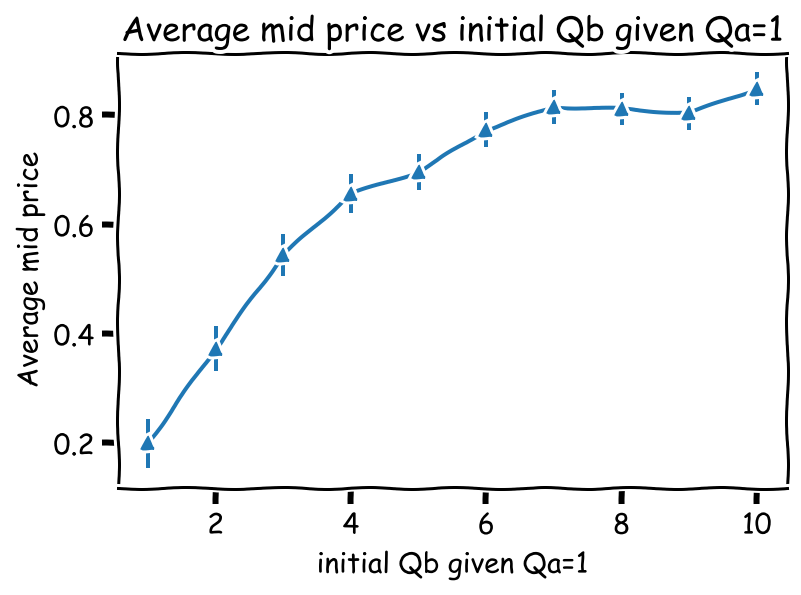

In [66]:
x = mid_price_df['qb']
y = mid_price_df['mid_price']
e = mid_price_df['std_err']
plt.errorbar(x, y, e, linestyle="-", marker='^')
plt.title('Average mid price vs initial Qb given Qa=1')
plt.xlabel('initial Qb given Qa=1')
plt.ylabel('Average mid price');
plt.show()

### <font color=blue> 5(c) Solution </font>

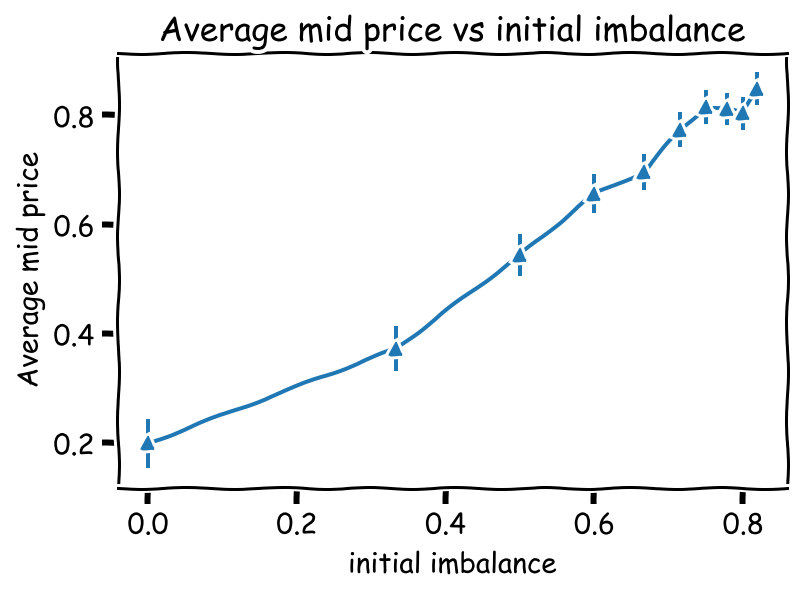

In [67]:
x = (mid_price_df['qb']-1)/(mid_price_df['qb']+1)
y = mid_price_df['mid_price']
e = mid_price_df['std_err']
plt.errorbar(x, y, e, linestyle="-", marker='^')
plt.title('Average mid price vs initial imbalance')
plt.xlabel('initial imbalance')
plt.ylabel('Average mid price');
plt.show()

### <font color=blue> 5(d) Solution </font>

Given that there is large quantity at the bid while small quantity at the ask/offer, the price will increase on average as shown in the graph above. The larger this imblance(quantity_bid/quantity_ask) is, the higher will the price in the future on average be. 

### Is the market price a martingale?

### 6. (4 points) 

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

### <font color=blue> 6 Solution </font>


In the Q Quant's perspective, the trading world is continous and there is one "price" that is the trading price. Based on stoch., we have asset prices are martingales, which is hard to predict future returns. But from the market microstructure perspective, there's not a singel price for all, and there is friction, whether it be in time or in the unites of the price, which is against a lot of the assumptions of the Q Quant world. So it seems fairly understandable that these two views have different opinions against each other.
As they are based on different assumptions, in the perfect marekt , I agree the asset prices should be martingales, but in reality, or when it's closer to the reality, it's not. That's the reason why P quant still exists. 
- The market is smart but not smart enough. 
- Trading is costly so we can have room to improve.

In brief, both understandings make sense under their own angles of view/frequency of the time frame, and each can model the market to some kind of extent to capture part of the dynamics of the market.